- Author: Ben Du
- Date: 2020-04-24 23:07:30
- Title: Broadcast Arrays in Numpy
- Slug: broadcast-arrays-in-numpy
- Category: Computer Science
- Tags: Computer Science, numpy, Python, broadcast, array, expand dimension, reshape
- Modified: 2020-04-24 23:07:30


## Tips and Traps

1. [numpy.expand_dims](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html?highlight=expand_dims#numpy.expand_dims)
    expands the shape of an array and returns a veiw (no copy is made). 
    It is very useful to help broadcasting arrays.

## numpy.broadcast

## [numpy.broadcast_to](https://numpy.org/doc/stable/reference/generated/numpy.broadcast_to.html?highlight=broadcast_to)

## [numpy.expand_dims](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html?highlight=expand_dims#numpy.expand_dims)

`numpy.expand_dims` returns a view (no copy is made) to the expanded array.
The example below illustrate this. 

Create a 2-d array `a1`.

In [37]:
a1 = np.array([[1, 2, 3], [4, 5, 6]])
a1

array([[1, 2, 3],
       [4, 5, 6]])

Expand the dimension of `a1` to be `(2, 3, 1)`.

In [39]:
a2 = np.expand_dims(a1, axis=2)
a2.shape

(2, 3, 1)

In [40]:
a2[:, :, 0]

array([[1, 2, 3],
       [4, 5, 6]])

Update an element of `a2`.

In [42]:
a2[0, 0, 0] = 1000

Notice that `a1` is updated too.

In [43]:
a1

array([[1000,    2,    3],
       [   4,    5,    6]])

## [numpy.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html?highlight=reshape#numpy.reshape) and [numpy.ndarray.reshape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html?highlight=numpy%20ndarray%20reshape#numpy.ndarray.reshape)

Both functions reshape the dimension of an array without changing the data.
A view (instead of a copy) of the original array is returned.
The example below illustrates this.

Create a 2-d array `a1`.

In [44]:
a1 = np.array([[1, 2, 3], [4, 5, 6]])
a1

array([[1, 2, 3],
       [4, 5, 6]])

Reshape the array `a1`.

In [45]:
a2 = a1.reshape((2, 3, 1))
a2.shape

(2, 3, 1)

In [46]:
a2[:, :, 0]

array([[1, 2, 3],
       [4, 5, 6]])

Update an element of `a2`.

You can pass the shape parameters as individual parameters instead of passing it as a tuple.

In [50]:
a1.reshape(2, 3, 1)

array([[[1000],
        [   2],
        [   3]],

       [[   4],
        [   5],
        [   6]]])

In [47]:
a2[0, 0, 0] = 1000

Notice that `a1` is updated too.

In [48]:
a1

array([[1000,    2,    3],
       [   4,    5,    6]])

## Use [numpy.expand_dims](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html?highlight=expand_dims#numpy.expand_dims) to Help Broadcast Arrays

All of `numpy.expand_dims`, `numpy.reshape` and `numpy.array.reshape` 
can be used to reshape an array to help broadcasting.
The below illustrates how to use `numpy.expand_dims` to help broadcast numpy arrays 
using an example of manipulating images.

Read in an image.

In [1]:
!wget https://user-images.githubusercontent.com/824507/128439087-0c935d86-bb34-4c2c-8e69-6d78b3022833.png -O 4s.jpg

--2021-08-05 17:48:59--  https://user-images.githubusercontent.com/824507/128439087-0c935d86-bb34-4c2c-8e69-6d78b3022833.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4588 (4.5K) [image/png]
Saving to: ‘4s.jpg’

4s.jpg              100%[===================>]   4.48K  --.-KB/s    in 0s      

2021-08-05 17:48:59 (17.2 MB/s) - ‘4s.jpg’ saved [4588/4588]



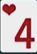

In [2]:
from PIL import Image
import numpy as np

img = Image.open("4s.jpg")
img

Convert the image to a numpy array.

In [34]:
arr = np.array(img)
arr.shape

(54, 37, 3)

Get the sum of channels.

In [12]:
channel_sum = arr.sum(axis=2, dtype=np.float32) + 0.01
channel_sum.shape

(54, 37)

Now suppose we want to calculate the ratio of each channel to this sum. 
It won't work if we use `arr / channel_sum` as the dimensions of the 2 arrays 
are not compatible for broadcasting. 
One solution is to expand the dimension of `channel_sum` to `(54, 37, 1)`
which is compatible for broadcasting with `arr`.
Notice that `numpy.expand_dims` returns a view (no copy is made) of the dim-expanded array.

In [14]:
np.expand_dims(channel_sum, axis=2).shape

(54, 37, 1)

In [16]:
ratios = arr / np.expand_dims(channel_sum, axis=2)
ratios.shape

(54, 37, 3)

If the values of the 3 channes are close enough (by comparing the max/min values of the ratios),
make the corresponding pixles white.

In [35]:
ratio_max = ratios.max(axis=2)
ratio_min = ratios.min(axis=2)
mask = (ratio_max - ratio_min) < 0.35
arr[mask, :] = 255

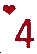

In [36]:
Image.fromarray(arr)

Notice that the slight shading effect in the original picture is removed.  

## References

[Array Broadcasting](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Broadcasting.html)